<a href="https://colab.research.google.com/github/lilyrausser/DS/blob/main/purchase_frequency_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generate customer centric analysis of purchasing behavior using k-means clustering.

In [ ]:
import pandas as pd
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
query2 = pd.read_csv('query2 (UPDATED).csv')
query2

,customer_id,total_spending,avg_transaction_spending,purchase_frequency,last_purchase_date,days_since_last_purchase
0,313,19.50,3.900000,5,2022-09-03,459
1,317,18.00,4.500000,4,2023-01-11,329
2,309,17.50,4.375000,4,2022-06-26,528
3,318,16.50,4.125000,4,2023-02-18,291
4,347,15.50,3.875000,4,2022-03-10,636
5,354,14.50,4.833333,3,2023-01-24,316
6,343,14.25,4.750000,3,2023-01-07,333
7,303,14.25,4.750000,3,2023-03-03,278
8,344,14.00,4.666667,3,2022-05-30,555
9,338,13.75,4.583333,3,2023-01-15,325


Variance Inflation Factor: determining correlation between columns

In [ ]:
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

#'total_spending',
cols = ['customer_id','avg_transaction_spending', 'purchase_frequency',	'days_since_last_purchase']
VIF(query2, cols)

customer_id                 1.020205
avg_transaction_spending    1.042293
purchase_frequency          1.201367
days_since_last_purchase    1.209108
dtype: float64

Total spending --> highly correlated with VIF of 80

In [ ]:
query2.dtypes

customer_id                  int64
total_spending               int64
avg_transaction_spending     int64
purchase_frequency           int64
last_purchase_date          object
days_since_last_purchase     int64
cluster                      int32
dtype: object

Determine Best K: Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

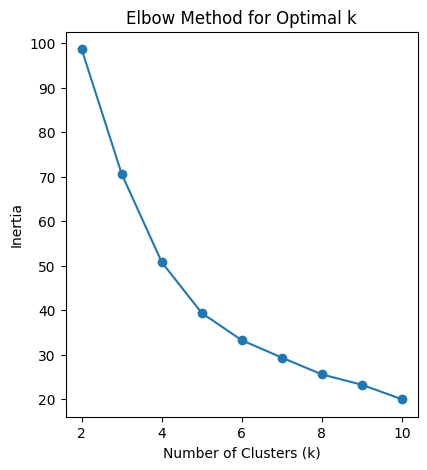

In [ ]:
#https://towardsdatascience.com/selecting-optimal-k-for-k-means-clustering-c7579fd2e926

def find_optimal_k(data, max_k):
    inertias = []
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_k + 1), inertias, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')

data = query2[['avg_transaction_spending', 	'purchase_frequency',	'days_since_last_purchase']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
max_k = 10
find_optimal_k(data_scaled, max_k)

In [ ]:
#features = [['customer_id','avg_transaction_spending', 	'purchase_frequency',	'days_since_last_purchase']]
numerical_features = query2[['avg_transaction_spending', 'purchase_frequency', 'days_since_last_purchase']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(numerical_features)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
query2['cluster'] = kmeans.fit_predict(features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


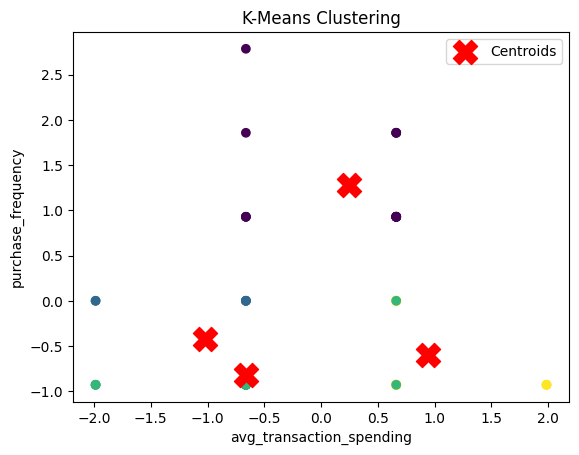

In [ ]:
#https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=query2['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('avg_transaction_spending')
plt.ylabel('purchase_frequency')
plt.legend()
plt.show()

In [ ]:
print(kmeans.cluster_centers_)

[[ 0.24834982  1.27665545 -0.48519589]
 [-1.02350228 -0.42203486 -0.33484737]
 [-0.66226618 -0.82531261  1.67186126]
 [ 0.94609454 -0.59687787 -0.257164  ]]


Cluster interpretation based on the printed centroids above:

***Cluster 0:***
'avg_transaction_spending' is slightly above the average
'purchase_frequency' is relatively high
'days_since_last_purchase' is below the average

*possibly indicated frequent/loyal customers

***Cluster 1:***
'avg_transaction_spending' is below the average
'purchase_frequency' is below the average
'days_since_last_purchase' is below the average

*possibly indicating less frequent customers

***Cluster 2:***
'avg_transaction_spending' is below the average
'purchase_frequency' is below the average
'days_since_last_purchase' is significantly above the average

*possibly indicating a less frequent customer that has the potential to be a more frequent customer

***Cluster 3:***
'avg_transaction_spending' is above the average
'purchase_frequency' is below the average
'days_since_last_purchase' is slightly below the average

*potentially a customer that doesn't go often, but when they go they purchase many items